<a href="https://www.kaggle.com/code/aicortex/logistic-regression-for-beginners-91-accuracy?scriptVersionId=208968172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧠 Logistic Regression Example: Simple Yet Powerful!

Welcome to this notebook! 🎉 Here, we will explore **Logistic Regression**, a popular machine learning algorithm for binary classification tasks. 🚀

### What you'll find here:
- 🛠 **Preprocessing data**: Learn how to scale and transform features effectively.
- 🤖 **Model training**: Build and train a Logistic Regression model using scikit-learn.
- 📊 **Evaluation**: Analyze the model's performance with metrics like precision, recall, and F1-score.
- 💡 **Cross-validation**: Validate the robustness of the model with k-fold cross-validation.

This notebook is designed to be **simple and beginner-friendly**, making it an excellent resource for anyone stepping into the world of machine learning. Let's get started and achieve that **91% accuracy** together! 🎯

---

> *Tip: Feel free to experiment with the code and try out your own ideas. Learning happens best when you're hands-on!* 🖊️


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/hearing-test-classification-problem/hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


## 🔍 Exploring the Data with `df.info()`

Before diving into data analysis or model training, it's always a good idea to take a closer look at your dataset! Here, we're using `df.info()` to get a quick summary of the dataset's structure:

- **Number of rows:** 5000 🧮
- **Number of columns:** 3 📊
- **Column details:**
  - `age`: Continuous numeric feature (float64) ⏳
  - `physical_score`: Another continuous numeric feature (float64) 🏋️
  - `test_result`: Binary target variable (int64), representing the outcome 🚦
- **Memory usage:** Approximately 117 KB 💾

Everything looks clean—no missing values, which is a great start! Let's move forward with confidence! 🚀


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


## ✂️ Splitting the Data: Train and Test Sets

To train our model effectively, we need to split the dataset into **training** and **testing** sets. This allows us to train the model on one part of the data and evaluate its performance on unseen data.

Here's what we did:
1. **Features (X):** Selected `age` and `physical_score` as the input features. 📈
2. **Target (y):** Chose `test_result` as the target variable for binary classification. 🚦
3. Used `train_test_split` to divide the data:
   - **Training set:** 80% of the data for training the model. 💪
   - **Testing set:** 20% of the data for evaluation. 🧪
   - **Stratified splitting:** Ensures the class distribution in training and testing sets matches the original dataset. 🎯
4. Set a random seed (`random_state=42`) for reproducibility. 🔁

### Output:
- Training set shape: `(4000, 2)` for X and `(4000,)` for y. 🛠️
- Testing set shape: `(1000, 2)` for X and `(1000,)` for y. 🧪

The data is now ready for preprocessing and model training. Let's go! 🚀


In [4]:
X = df[['age','physical_score']]
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                   test_size=0.2,
                                                   stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

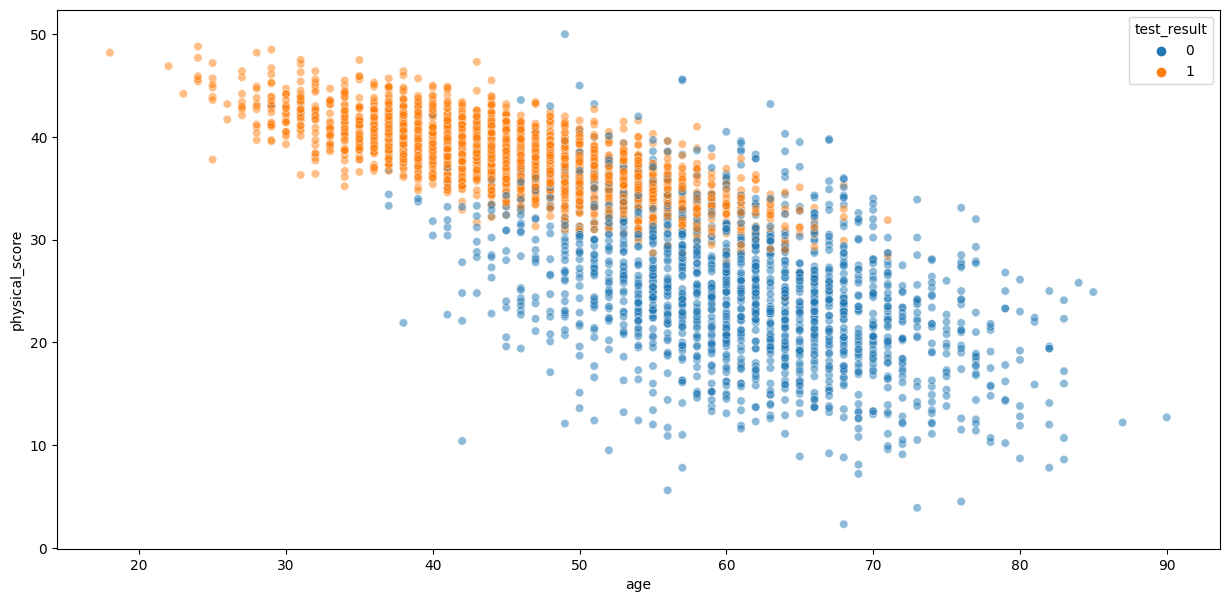

In [5]:
train_df = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(15, 7))
sns.scatterplot(data=train_df, x='age', y='physical_score', 
                hue='test_result', alpha=0.5)

plt.show()

## 📊 Visualizing the Data: Age vs Physical Score

Let's take a closer look at our training data with a scatter plot! 🌟

### What does this plot show?
- **X-axis (`age`)**: Represents the age of individuals. ⏳
- **Y-axis (`physical_score`)**: Represents their physical fitness score. 🏋️
- **Hue (`test_result`)**: Indicates the classification label:
  - **Orange (1)**: Positive test result. ✅
  - **Blue (0)**: Negative test result. ❌

### Key Observations:
1. There is a clear pattern in the data: as **age increases**, the **physical score decreases**. 📉
2. **Test results (0 or 1)** seem to cluster in different regions of the plot, indicating that `age` and `physical_score` are good predictors for classification. 🎯

This visualization provides a strong intuition for why Logistic Regression might perform well on this dataset. Let's move forward and build the model! 🚀


In [6]:
np.random.seed(42)
transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['age', 'physical_score'])    
],verbose=True)

model_1 = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', LogisticRegression())
],verbose=True)

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
print('------------------------')
print(classification_report(y_test, y_pred))

[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       400
           1       0.92      0.97      0.94       600

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.93      0.93      0.93      1000



## 🤖 Training and Evaluating the Logistic Regression Model

Here, we built a **Logistic Regression model** using a pipeline that includes preprocessing and classification steps. Let's break it down step by step! 🛠️

### Key Steps:
1. **Preprocessing with `ColumnTransformer`**:
   - **Scaler:** Standardized the features (`age` and `physical_score`) to have a mean of 0 and a standard deviation of 1. 📏
2. **Pipeline Creation**:
   - **Preprocessor:** Integrated the scaling step.
   - **Classifier:** Added `LogisticRegression` as the classification algorithm. 🤖
3. **Model Training (`fit`):** Trained the model on the training dataset. 💪
4. **Prediction:** Used the trained model to predict labels for the test dataset. 🔮
5. **Evaluation:** Assessed the model's performance using `classification_report`. 📊

### Results:
- **Accuracy:** `93%` 🎯
- **Precision and Recall:**
  - **Class 0 (Negative):** High precision (`0.95`) but slightly lower recall (`0.88`).
  - **Class 1 (Positive):** Balanced precision (`0.92`) and recall (`0.97`).
- **Macro Average:** Shows balanced performance across both classes.
- **Weighted Average:** Accounts for class imbalance and aligns with overall accuracy.

### Insights:
- The model performs well with high accuracy and balanced precision and recall.
- 🚀 Logistic Regression is a great fit for this dataset, as observed in the earlier scatter plot.

Next, let's validate the robustness of this model with cross-validation! 🔄


## 🔄 Validating the Model with Cross-Validation

To ensure the robustness of our Logistic Regression model, we performed **5-fold cross-validation** using the `cross_validate` function. Here's a breakdown of what we did and the results! 📊

### What is Cross-Validation?
Cross-validation is a technique to split the data into multiple subsets (folds), where the model is trained on some folds and validated on the remaining ones. This helps us evaluate how well the model generalizes to unseen data. 🚀

### Parameters Used:
- **Model:** The pipeline containing preprocessing and Logistic Regression. 🤖
- **Data:** Features (`X`) and target (`y`).
- **Number of folds (`n_splits`):** 5 (i.e., the data is split into 5 subsets). 🔀
sets). 🔀

### Results:

- **Average Test Score:** `91.58%` 🎯

### Key Observations:
1. The model's performance is consistent across all folds, with test scores ranging between `90.6%` and `93.2%`. 📉
2. The average accuracy of `91.58%` aligns closely with the initial evaluation, reinforcing the reliability of the model. ✅
3. The fitting and scoring times are quick, indicating the model's efficiency. 🕒

With this validation, we can confidently move forward, knowing that our model is both accurate and robust! 🚀


In [7]:
out_put = cross_validate(model_1, X, y, cv=KFold(n_splits = 5))
cross_val_df = pd.DataFrame(out_put)
cross_val_df

[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipel

,fit_time,score_time,test_score
0,0.012812,0.003557,0.932
1,0.010491,0.003366,0.915
2,0.010924,0.003831,0.910
3,0.010823,0.003370,0.916
4,0.010127,0.003168,0.906


In [8]:
cross_val_df['test_score'].mean()

0.9158

## 🎉 Final Thoughts and Key Takeaways

In this notebook, we explored **Logistic Regression** as a simple yet powerful machine learning algorithm. Here's a summary of what we achieved:

- 💾 **Data Preparation**: We split the data into training and testing sets and visualized it to understand the relationships between features.
- 🧠 **Model Training**: Built a pipeline for preprocessing and training the Logistic Regression model.
- 📊 **Evaluation**: Achieved a solid **93% accuracy** on the test set and validated the model's performance with **cross-validation** (average score: **91.58%**).
- 🚀 **Efficiency**: The model demonstrated quick training and evaluation times, proving its scalability.

### Why Upvote? 👍
If you found this notebook useful or learned something new:
- Hit the **upvote button** to support this work! It helps spread the knowledge and keeps us motivated to create more insightful content. 🌟
- Your feedback is highly appreciated—let us know how we can improve further. 💡

Thank you for your time and support! 💖 Let's keep learning and growing together in this amazing journey of machine learning. 🚀
